In [1]:
#pip install mlxtend

In [2]:
#pip install imblearn

In [3]:
#pip install geopandas

In [4]:
#pip install category_encoders

In [5]:
#pip install xgboost

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

In [7]:
data = pd.read_csv("daft.csv")

In [8]:
data.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601


#### Data Explanation

##### Data Source : Daft.ie
* id: Property listing id used in the website
* title: property address.
* featuredLevel: ['featured' 'premium' 'standard']
* publishDate: published date for the listing.
* price: house price.
* numBedrooms: No. of bedrooms.
* numBathrooms: No. of bathroom.
* propertyType: ['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow' 
'Townhouse' 'Duplex' 'Site' 'Studio' 'House'.
* propertySize: Size of the property in meters squared
* category: ['Buy' 'New Homes'] (Buy means the houses listed under Buy menu in the websites)
* AMVprice: Advised minimum value (some properties have AMV price. The price column was mixed with regular price and AMV price, created a new column for AMV price to flag if it is AMV or not.)
* sellerId: Seller's Id
* sellername: Seller's name
* sellerbranch: Seller's branch if it is an agency.
* sellerType: ['BRANDEDAGENT' 'UNBRANDEDAGENT' 'PRIVATEUSER']
* m_totalImages: Total images posted on the website.
* m_hasVideo: Whether the property posted a video or not.
* m_hasVirtualTour: Whether the property has a virtual tour or not.
* m_hasBrochure: Whether the property has a brochure or not.
* longitude: Coordinate
* latitude: Coordinate
* ber_rating: ['C2' 'C1' 'A3' 'G' 'D2' 'B3' 'D1' 'C3' 'E1' 'SI666' 'F' 'E2' 'B2' 'XXX', 'A2,''B1' 'A1' 'A1A2']
(XXX means the rating was missing)
] 

#### Quick peek into the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


#### Categorical Data
* featuredLevel, propertyType, category,  sellerType, seller_branch, seller_name, ber_rating, title, id, sellerId, m_hasVideo, m_hasBrochure, m_hasVirtualTour             
#### Numerical Data
Continouous:
* price, numBedrooms, numBathrooms, latitude, longitude, m_totalImages, AMV_price, , propertySize.

Disrete:
* publishDate

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3967.0,3.629047e+06,250247.854757,10921.000000,3.654066e+06,3.673795e+06,3.685990e+06,3.695402e+06
price,3967.0,3.416734e+05,270358.241779,20000.000000,1.950000e+05,2.750000e+05,3.950000e+05,4.500000e+06
numBedrooms,3967.0,3.126292e+00,1.230570,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,2.300000e+01
numBathrooms,3967.0,2.077136e+00,1.167772,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,2.300000e+01
propertySize,3612.0,1.326739e+02,295.246580,1.000000,7.800000e+01,1.030000e+02,1.370000e+02,8.600000e+03
AMV_price,3967.0,4.739098e-02,0.212500,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sellerId,3967.0,2.163815e+04,254150.598747,7.000000,2.178000e+03,3.255000e+03,8.806000e+03,5.310328e+06
m_totalImages,3967.0,1.844895e+01,10.537226,0.000000,1.200000e+01,1.700000e+01,2.300000e+01,1.040000e+02
longitude,3967.0,-7.389964e+00,1.865587,-100.445882,-8.426627e+00,-7.050391e+00,-6.298945e+00,-6.028016e+00
latitude,3967.0,5.313382e+01,0.716435,39.783730,5.266612e+01,5.330335e+01,5.343872e+01,5.529969e+01


#### Checking for Null Values

In [11]:
for i in data[data.columns[data.isnull().any()]].columns:
    print('- ',i)

-  propertySize


#### propertySize is missing around 355 values, which is around 10% of the total, hence dropping the records will impact the performance of our model therefore we need to fill the missing values with the median value.
If the data is heavily skewed or has outliers, the median is a better choice as it is robust to extreme values. The median represents the middle value and is less influenced by extreme observations.

In [12]:
median_value = data['propertySize'].median() 
data['propertySize'].fillna(value=median_value, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3967 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


#### Price Distribution

<Figure size 1000x600 with 0 Axes>

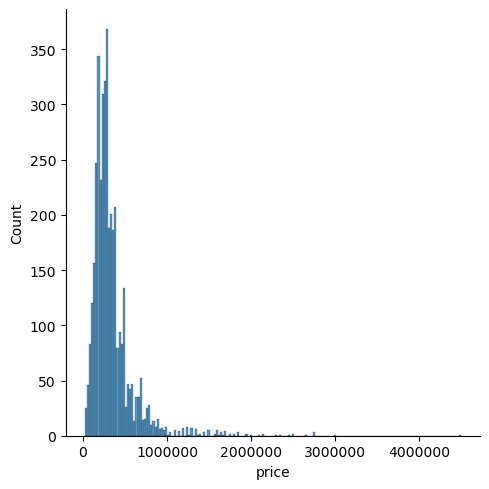

In [14]:
plt.figure(figsize=(10, 6))
sns.displot(data['price'])
plt.ticklabel_format(style='plain', axis='x')

* Majority of the house pricing is under half a million. With a few houses being nearly 3 million!
* Price is heavily right skewed

#### Price vs Size of property

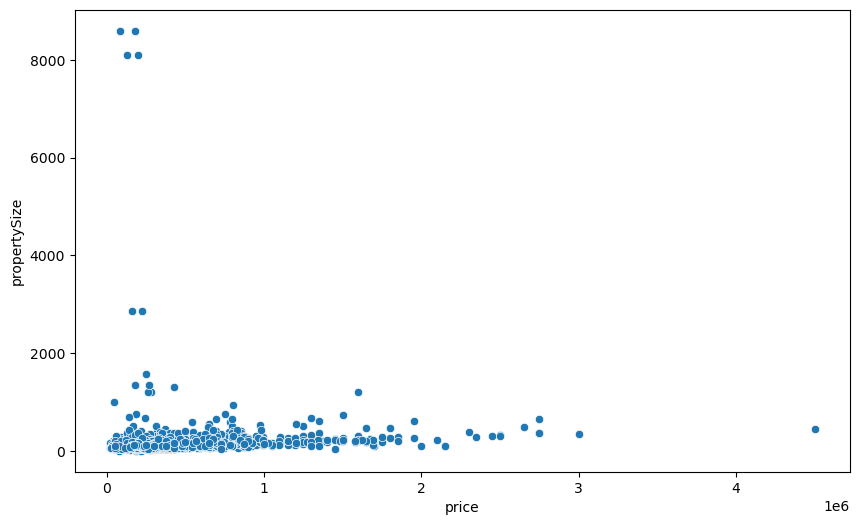

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="propertySize", data=data)
plt.ticklabel_format(style='plain', axis='y')

* In the cluster, a weak trend of increasing prices with increasing property size can be seen. However, there are few records where the property size has increased but the price is still near the lowest. This could indicate errors in the data.

#### Number of Bedrooms vs Price

<Axes: xlabel='numBedrooms', ylabel='price'>

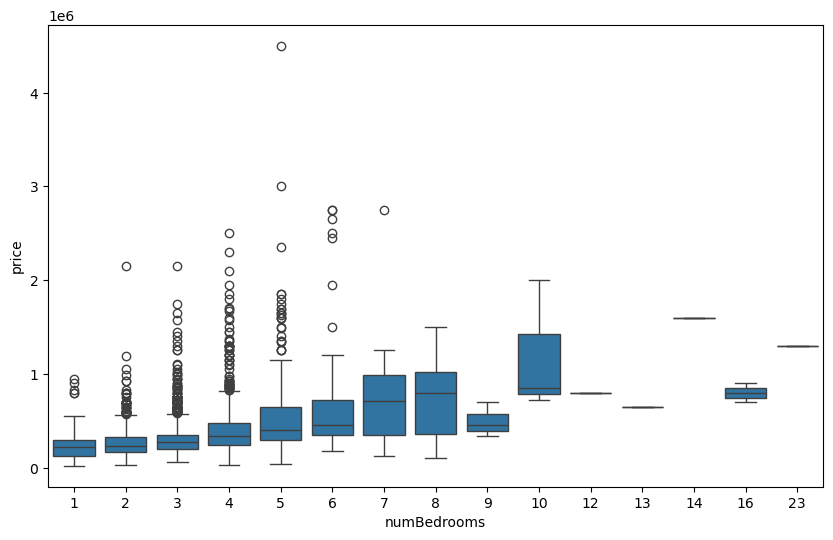

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="numBedrooms", y="price")

* We can see that the prices tend to go up with the number of bedrooms.
* The price variance in houses with lower number of bedrooms is lower as compared to the variance in prices of houses with high number of bedrooms.
* Visible values that are outside of the 75th percentile.

In [17]:
grouped_data = data.groupby('ber_rating')['price'].mean().reset_index()

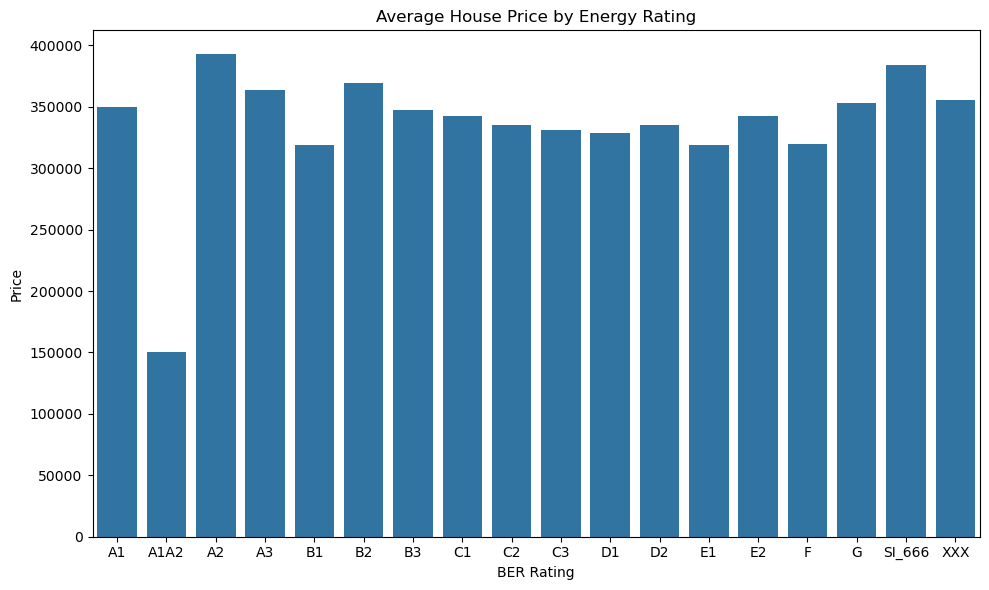

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ber_rating', y='price', data=grouped_data)
plt.xlabel('BER Rating')
plt.ylabel('Price')
plt.title('Average House Price by Energy Rating')
plt.tight_layout()

* According to https://www.seai.ie/home-energy/building-energy-rating-ber/understand-a-ber-rating , Sl_666 and XXX are possible errors.
* The average size house rating in ireland is D2, we can see that prices take a dip around this area which shows market competition.
* The price of A1A2 rated house seems lower than the average, considering A1A2 is not a real rating, this will be explored further.

#### Price Trends Respective to the Type of Property

<Axes: xlabel='propertyType', ylabel='price'>

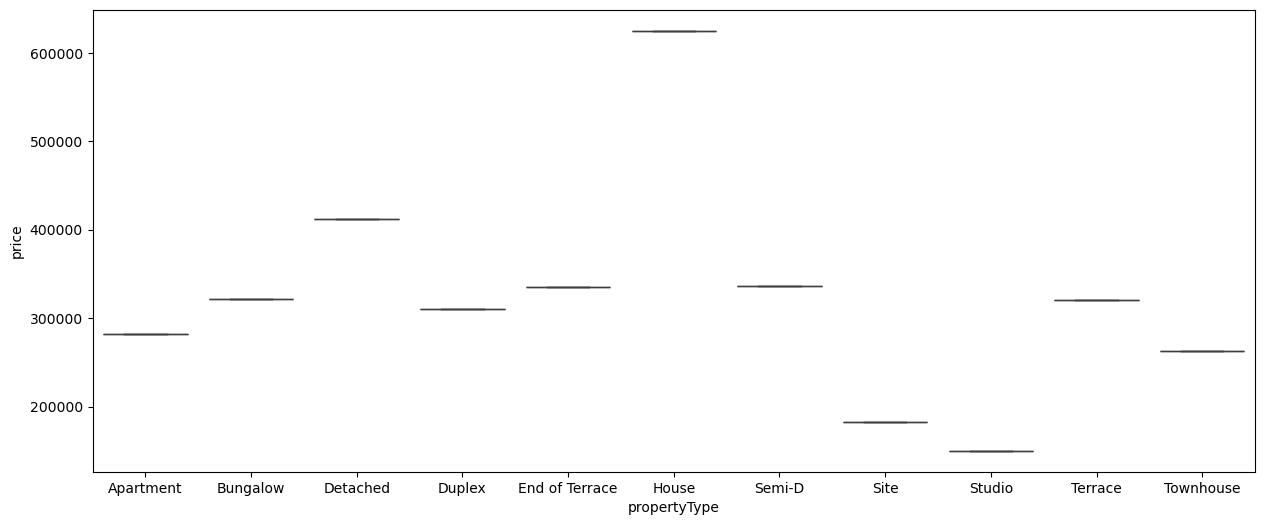

In [19]:
plt.figure(figsize=(15, 6))
grouped_data = data.groupby('propertyType')['price'].mean().reset_index()
sns.boxplot(x='propertyType',y='price',data=grouped_data)

* As per daft.ie, a 'House' is any property irrelevant of its type. Following this, the average price for a 'house' should be in the middle of all other values, but in the figure above, it is the highest averaging type, this shows rare records or possibly outliers
* Detached houses are the most costly, whereas studios are the cheapest to buy.

#### Biggest Market Share By Investor

In [20]:
grouped_data = data.groupby('seller_branch')['price'].sum().reset_index()
grouped_data = grouped_data.sort_values(by=['price'], ascending=False)
top_5 = grouped_data.head(5)

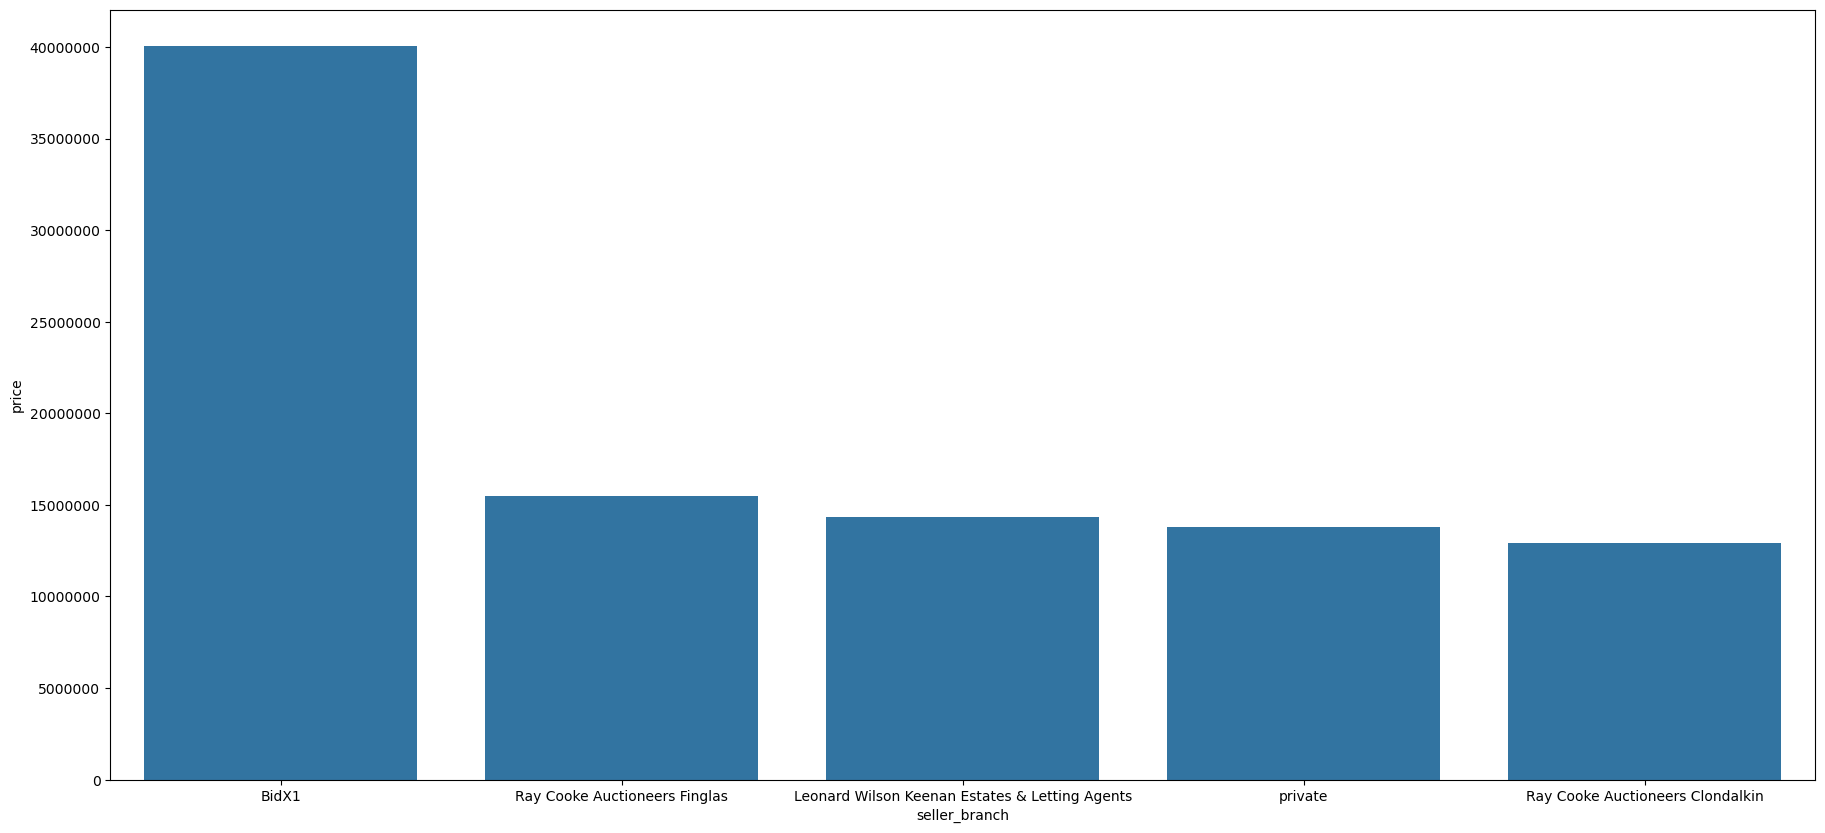

In [21]:
plt.figure(figsize=(22, 10))
sns.barplot(top_5, x="seller_branch", y="price")
plt.ticklabel_format(style='plain', axis='y')

* BidX1 has the largest market share of 40 million!
* Private owners have the 4th highest share of properties.

#### Feature Engineering

* Converting Date to DateTime and splitting into Year and Month

In [22]:
data['publishDate'] = pd.to_datetime(data['publishDate'])

In [23]:
data['year'] = data['publishDate'].dt.year
data['month'] = data['publishDate'].dt.month

data.drop(['publishDate'], axis=1, inplace = True)

* Using clustering to replace latitude and longitude with a location cluster as the co-ordinates themselves do not present any usability for ML according to the source below.

https://heartbeat.comet.ml/working-with-geospatial-data-in-machine-learning-ad4097c7228d

In [24]:
coords = pd.DataFrame()
coords['longitude'] = data['longitude']
coords['latitude'] = data['latitude']

In [25]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(data[['longitude','latitude']])
data['zone'] = clusters
data.drop(['latitude', 'longitude'], axis=1, inplace = True)

C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


* Extracting county and Town from Address.

In [26]:
def getCounty(title):
    address_parts = title.split(',')
    return address_parts[-1].strip()

In [27]:
def getTown(title):
    address_parts = title.split(',')
    return address_parts[-2].strip()

In [28]:
data['county'] = data['title'].apply(getCounty)

In [29]:
data['town'] = data['title'].apply(getTown)

In [30]:
data.drop(['title'], axis=1, inplace = True)

In [31]:
data['county'] = data['county'].str.replace('Co. ', '')

In [32]:
data['county'] = data['county'].str.extract(r'([a-zA-Z]+)')

In [33]:
data['town'] = data['town'].str.extract(r'([a-zA-Z]+)')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   featuredLevel     3967 non-null   object 
 2   price             3967 non-null   int64  
 3   numBedrooms       3967 non-null   int64  
 4   numBathrooms      3967 non-null   int64  
 5   propertyType      3967 non-null   object 
 6   propertySize      3967 non-null   float64
 7   category          3967 non-null   object 
 8   AMV_price         3967 non-null   int64  
 9   sellerId          3967 non-null   float64
 10  seller_name       3967 non-null   object 
 11  seller_branch     3967 non-null   object 
 12  sellerType        3967 non-null   object 
 13  m_totalImages     3967 non-null   float64
 14  m_hasVideo        3967 non-null   bool   
 15  m_hasVirtualTour  3967 non-null   bool   
 16  m_hasBrochure     3967 non-null   bool   


#### Domain Knowledge
* Dropping Advertisement ID as it is a daft.ie listing identifier and the ML model may interpret this as a mathematical input.
* Example: If a house with id 1 is priced at 200,000 and another house with id 45 is priced at 500,000 the machine learning model might
interpret this as if the id goes up, the price will also go up, which is completely incorrect. 

In [35]:
data.drop(['id'], axis=1, inplace = True)

In [36]:
data.drop(['sellerId'], axis=1, inplace = True)

#### Average House Price by Month

<Axes: xlabel='month'>

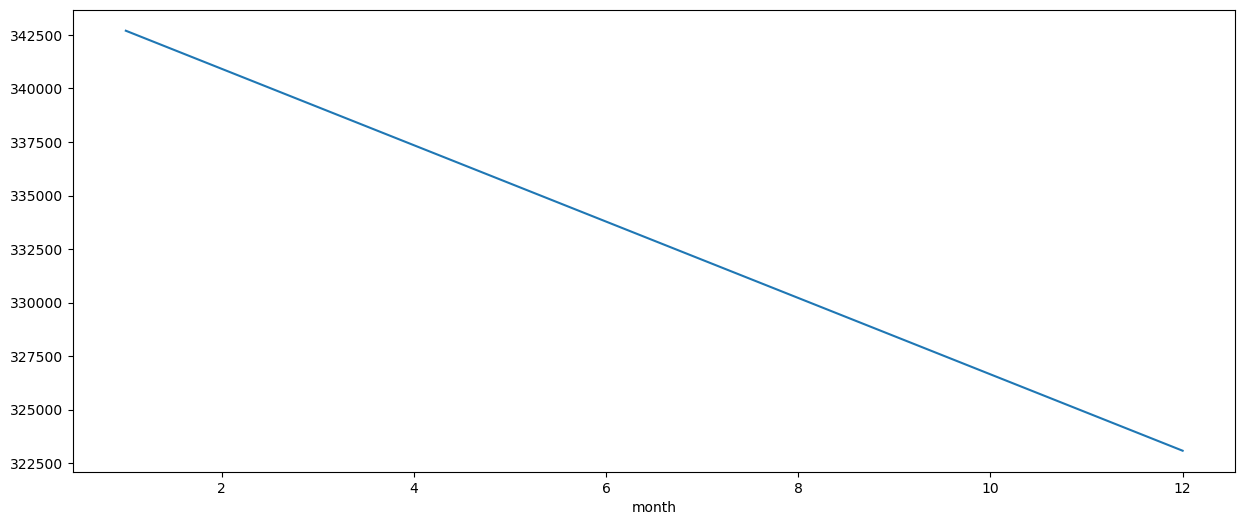

In [37]:
plt.figure(figsize=(15, 6))
data.groupby('month')['price'].mean().plot()

* Price of housing tends to fall by almost 20000 during the last month of the year. 

#### A look into the distribution of data

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'numBedrooms'}>,
        <Axes: title={'center': 'numBathrooms'}>],
       [<Axes: title={'center': 'propertySize'}>,
        <Axes: title={'center': 'AMV_price'}>,
        <Axes: title={'center': 'm_totalImages'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'zone'}>]], dtype=object)

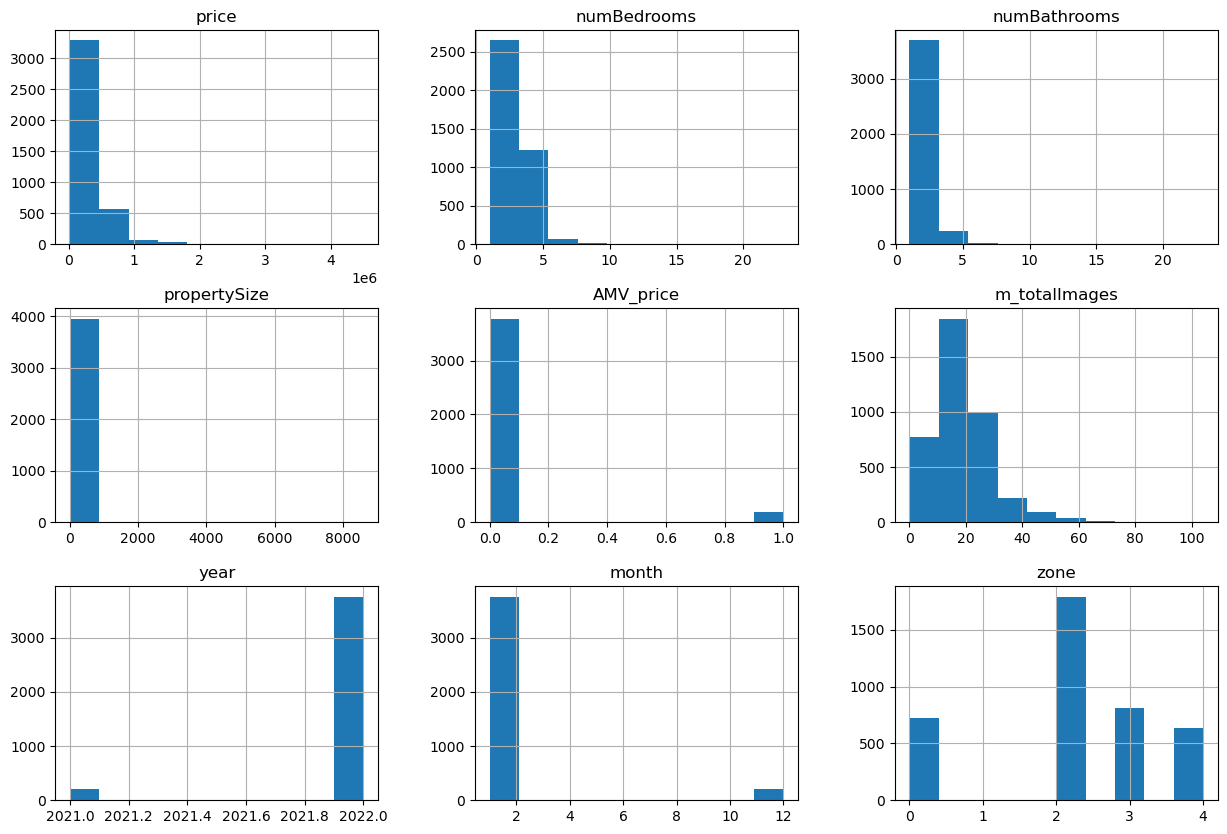

In [38]:
data.hist(figsize=(15,10))

* Data is skewed and unbalanced.

#### Test Train Split

https://onlinelibrary.wiley.com/doi/full/10.1002/sam.11583
* According to this study, the best test to train split ratio is the square root of number of features to 1. We have 22 features which gives us around 4.6:1 , which means the best split is 75/25.

In [39]:
X = data.drop(['price'], axis=1)
y = data['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [41]:
train_data = X_train.join(y_train)

In [42]:
train_data.head()

,featuredLevel,numBedrooms,numBathrooms,propertyType,propertySize,category,AMV_price,seller_name,seller_branch,sellerType,...,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,year,month,zone,county,town,price
3195,standard,5,1,Detached,138.0,Buy,0,Eamon Scanlon,E & M Scanlon Auctioneers & Estate Agents Ltd,UNBRANDED_AGENT,...,False,False,False,G,2021,12,0,Donegal,Muff,200000
2307,standard,4,1,Detached,174.0,Buy,1,Marc Browne,DNG Tallaght,BRANDED_AGENT,...,False,True,False,A2,2022,1,2,Wexford,Wexford,195000
111,featured,4,3,Detached,204.0,Buy,0,Raymond Potterton,Glenveagh Homes,UNBRANDED_AGENT,...,False,False,True,A3,2022,1,2,Wicklow,Roundwood,450000
2329,standard,3,3,Detached,149.0,Buy,0,Geraldine Tracey,Team Lorraine Mulligan RE/MAX Results,BRANDED_AGENT,...,False,False,False,D2,2022,1,2,Kildare,Monasterevin,390000
1089,standard,3,1,Detached,103.0,Buy,0,Daragh Heraghty,Daragh Heraghty Auctioneer,BRANDED_AGENT,...,False,False,False,D2,2022,1,0,Roscommon,Boyle,150000


#### Encodings

* Emphasis has been put on keeping the dimensionality of the dataset as low as possible.
* Label encoding was tested and resulted in values being used as ordinal, therefore, other types of encoding was preffered.
* Label encoders work well only with decision tree based algorithms, where as we want to use linear models.


#### One Hot Encodings. propertyType, category, sellerType.

* Reasoning: High cardinality features result in increased memory usage due to the amount of dummy variables required to encode them which reduces the models performance. Therefore, they should be grouped based on some criteria and then encoded.
* https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b

#### Ordinal Encodings. featuredLevel, ber_rating

* Reasoning: As the cardinality is relatively lower (only 3 unique values) and the values follow a natural progression.
* According to daft.ie : standard < premium < featured.

#### Target Encoding : town, county, sellername and seller branch

* Leave one out encoding
* Reasoning: As we have so many distinct values, for every row, LOO will calculate the mean of targets without the current data point in calculations. This prevents data leakage and there is no additional dimensionality.
* https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b#:~:text=Leave%2DOne%2DOut%20Encoding%20(,which%20belongs%20to%20that%20category.

In [43]:
def encode(df):
    df['propertyType'].replace(['End of Terrace', 'Bungalow', 'Townhouse', 'Duplex', 'Site', 'House', 'Studio'], 'Other', inplace=True)
    df  = pd.get_dummies(df, columns = ['propertyType'], dtype=float)
    df  = pd.get_dummies(df, columns = ['category'], dtype=float)
    df  = pd.get_dummies(df, columns = ['sellerType'], dtype=float)
    
    featuredLevels = ['standard', 'premium', 'featured']
    ber_ratings = ['XXX', 'SI_666', 'G', 'F', 'E2', 'E1', 'D2', 'D1', 'C3', 'C2', 'C1', 'B3', 'B2', 'B1', 'A3', 'A2', 'A1A2', 'A1']

    encoder = OrdinalEncoder(categories=[featuredLevels, ber_ratings])
    df[['featuredLevel', 'ber_rating']] = encoder.fit_transform(df[['featuredLevel', 'ber_rating']]) 
    
    #df['county'] = df['county'].where(df['county'].isin(['Dublin', 'Limerick', 'Kildare', 'Galway', 'Louth', 'Cork', 'Mayo', 'Westmeath', 'Wexford', 'Kerry', 'Meath', 'Donegal', 'Roscommon', 'Wicklow', 'Waterford', 'Tipperary', 'Clare', 'Laois', 'Offaly', 'Kilkenny', 'Sligo', 'Cavan', 'Carlow', 'Leitrim', 'Longford', 'Monaghan']), other='Other')
    df['county'] = df['county'].where(df['county'].isin(['Dublin']), other='Other')
    df  = pd.get_dummies(df, columns = ['county'], dtype=float)
    #encoder = ce.LeaveOneOutEncoder(cols=['county'])
    #data_encoded = encoder.fit_transform(df['county'], df['price'])
    #df = df.merge(data_encoded, how = 'left', left_index=True, right_index=True)
    #df.drop(['county_x'], axis=1, inplace = True)
    
    encoder = ce.LeaveOneOutEncoder(cols=['town'])
    data_encoded = encoder.fit_transform(df['town'], df['price'])
    df = df.merge(data_encoded, how = 'left', left_index=True, right_index=True)
    df.drop(['town_x'], axis=1, inplace = True)

    encoder = ce.LeaveOneOutEncoder(cols=['seller_branch'])
    data_encoded = encoder.fit_transform(df['seller_branch'], df['price'])
    df = df.merge(data_encoded, how = 'left', left_index=True, right_index=True)
    df.drop(['seller_branch_x'], axis=1, inplace = True)
    
    encoder = ce.LeaveOneOutEncoder(cols=['seller_name'])
    data_encoded = encoder.fit_transform(df['seller_name'], df['price'])
    df = df.merge(data_encoded, how = 'left', left_index=True, right_index=True)
    df.drop(['seller_name_x'], axis=1, inplace = True)
   
   
    
    df[['m_hasVideo','m_hasVirtualTour', 'm_hasBrochure']] = df[['m_hasVideo','m_hasVirtualTour', 'm_hasBrochure']].astype(float)
           
    return df

In [44]:
train_data = encode(train_data)

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 3195 to 3174
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   featuredLevel               2776 non-null   float64
 1   numBedrooms                 2776 non-null   int64  
 2   numBathrooms                2776 non-null   int64  
 3   propertySize                2776 non-null   float64
 4   AMV_price                   2776 non-null   int64  
 5   m_totalImages               2776 non-null   float64
 6   m_hasVideo                  2776 non-null   float64
 7   m_hasVirtualTour            2776 non-null   float64
 8   m_hasBrochure               2776 non-null   float64
 9   ber_rating                  2776 non-null   float64
 10  year                        2776 non-null   int32  
 11  month                       2776 non-null   int32  
 12  zone                        2776 non-null   int32  
 13  price                       2776 no

<Axes: >

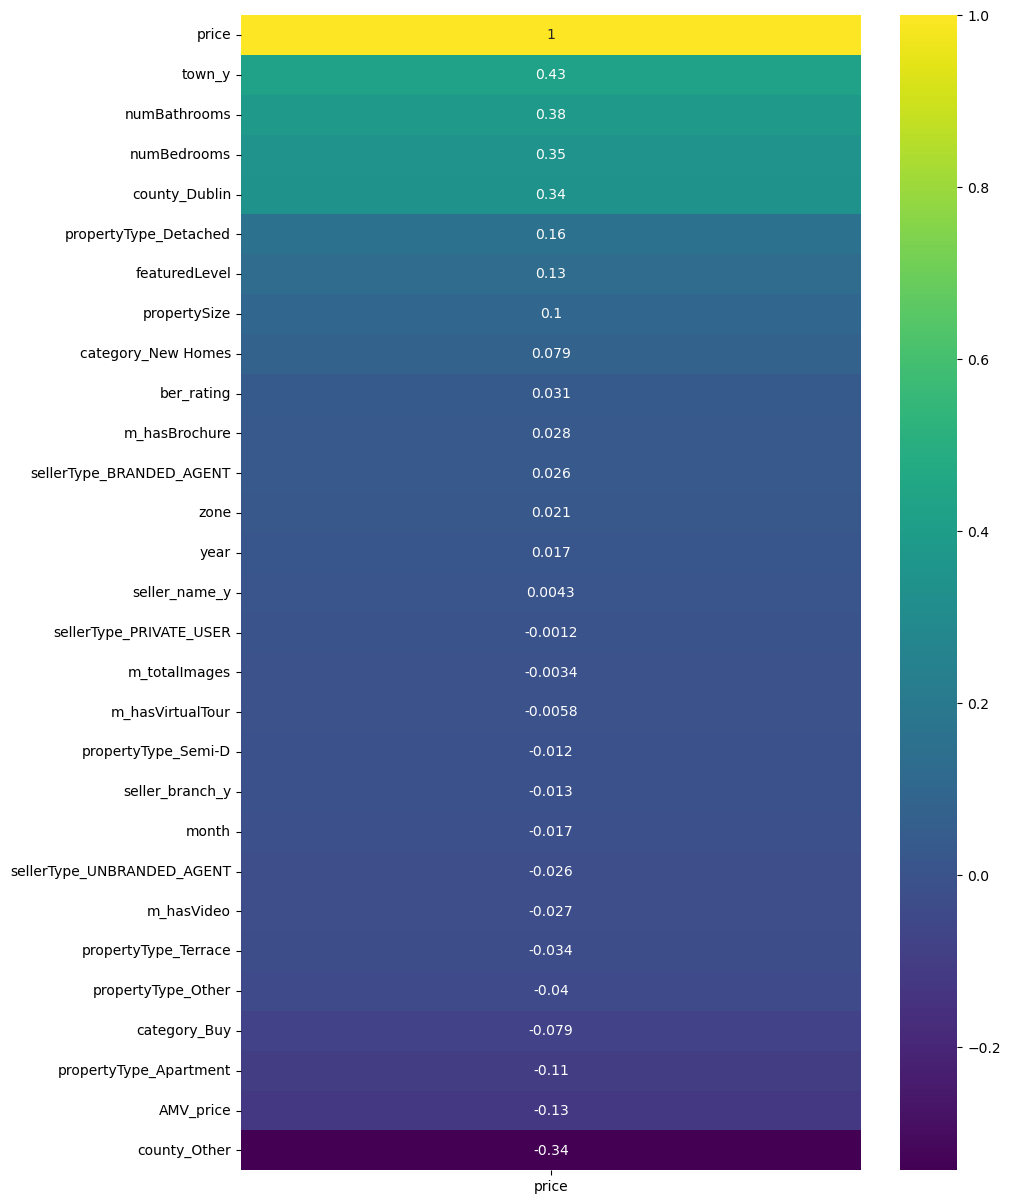

In [46]:
plt.figure(figsize=(10, 15))
sns.heatmap(train_data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='viridis')

 ---------------------------------------------------------------------- 

C:\Users\Ali\AppData\Local\Temp\ipykernel_36256\1200805299.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


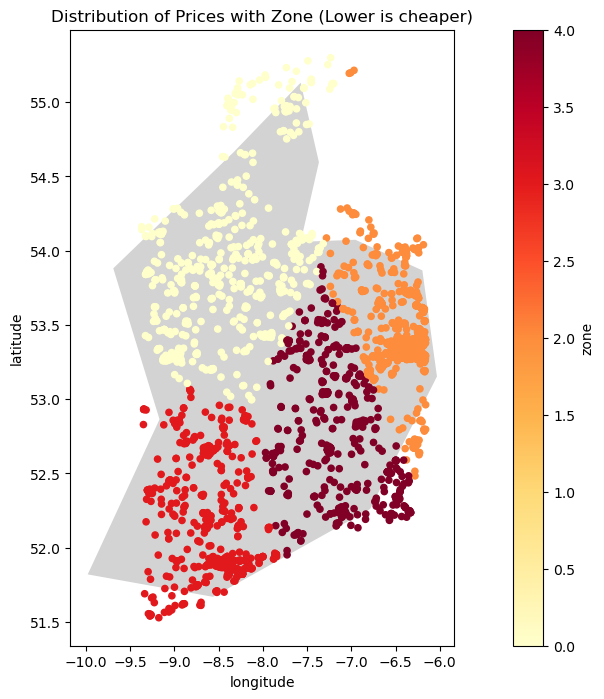

In [47]:
data = data.join(coords)
fig, ax = plt.subplots(figsize=(15,8))

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Ireland"].plot(color="lightgrey", ax=ax)
min_longitude = data['longitude'].quantile(0.05)  # 5th percentile
max_longitude = data['longitude'].quantile(0.95)  # 95th percentile

filtered_data = data[(data['longitude'] >= min_longitude) & (data['longitude'] <= max_longitude)]

filtered_data.plot(x='longitude', y='latitude', kind="scatter", c="zone", colormap="YlOrRd",
title="Distribution of Prices with Zone (Lower is cheaper)", ax=ax)
plt.show()

#### Normalizing Data

* Normalizing the whole sets including target variable provides a better fit and increases the R2 scores by 6% in our case.
* Will need to transform the output.
* Otherwise, datasets can be normalized except the target variable.

In [48]:
from sklearn.preprocessing import normalize

train_data['propertySize'] = np.log(train_data['propertySize']+1)
train_data['numBedrooms'] = np.log(train_data['numBedrooms']+1)
train_data['numBathrooms'] = np.log(train_data['numBathrooms']+1)

orig_train = train_data.astype(float)
f = normalize(train_data, norm="l2")
train_data = pd.DataFrame(data=f, columns=train_data.columns)


test_data = X_test.join(y_test)
test_data = encode(test_data)

test_data['propertySize'] = np.log(test_data['propertySize']+1)
test_data['numBedrooms'] = np.log(test_data['numBedrooms']+1)
test_data['numBathrooms'] = np.log(test_data['numBathrooms']+1)

orig_test = test_data.astype(float)
f = normalize(test_data, norm="l2")
test_data = pd.DataFrame(data=f, columns=test_data.columns)

# To replace target variables with original values.
train_data['price'] = orig_train['price'].values
test_data['price'] = orig_test['price'].values

In [49]:
X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']
X_test, y_test = test_data.drop(['price'], axis=1), test_data['price']

In [50]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=10)

X_selected = fs.fit_transform(X_train, y_train)
cols_from_k=X_train.columns[fs.get_support(indices=True)]
cols_from_k

Index(['numBedrooms', 'numBathrooms', 'propertySize', 'm_totalImages',
       'ber_rating', 'year', 'category_Buy', 'county_Other', 'seller_branch_y',
       'seller_name_y'],
      dtype='object')

In [51]:
X_train = train_data[cols_from_k]
X_test = test_data[cols_from_k]

In [52]:
X_train

,numBedrooms,numBathrooms,propertySize,m_totalImages,ber_rating,year,category_Buy,county_Other,seller_branch_y,seller_name_y
0,0.000003,1.100702e-06,0.000008,0.000030,0.000003,0.003209,0.000002,0.000002,0.555792,0.543240
1,0.000003,1.364255e-06,0.000010,0.000037,0.000030,0.003980,0.000002,0.000002,0.614769,0.494265
2,0.000002,1.824565e-06,0.000007,0.000001,0.000018,0.002661,0.000001,0.000001,0.542326,0.568794
3,0.000002,2.038384e-06,0.000007,0.000035,0.000009,0.002973,0.000001,0.000001,0.505797,0.505797
4,0.000005,2.339753e-06,0.000016,0.000044,0.000020,0.006825,0.000003,0.000003,0.506333,0.506333
...,...,...,...,...,...,...,...,...,...,...
2771,0.000002,1.471538e-06,0.000011,0.000049,0.000008,0.004293,0.000002,0.000002,0.394420,0.392751
2772,0.000002,2.015157e-06,0.000006,0.000028,0.000013,0.002532,0.000001,0.000001,0.493059,0.435050
2773,0.000002,1.783051e-06,0.000007,0.000019,0.000015,0.003282,0.000002,0.000000,0.555222,0.555222
2774,0.000003,1.334845e-06,0.000009,0.000039,0.000027,0.003894,0.000002,0.000000,0.510330,0.510330


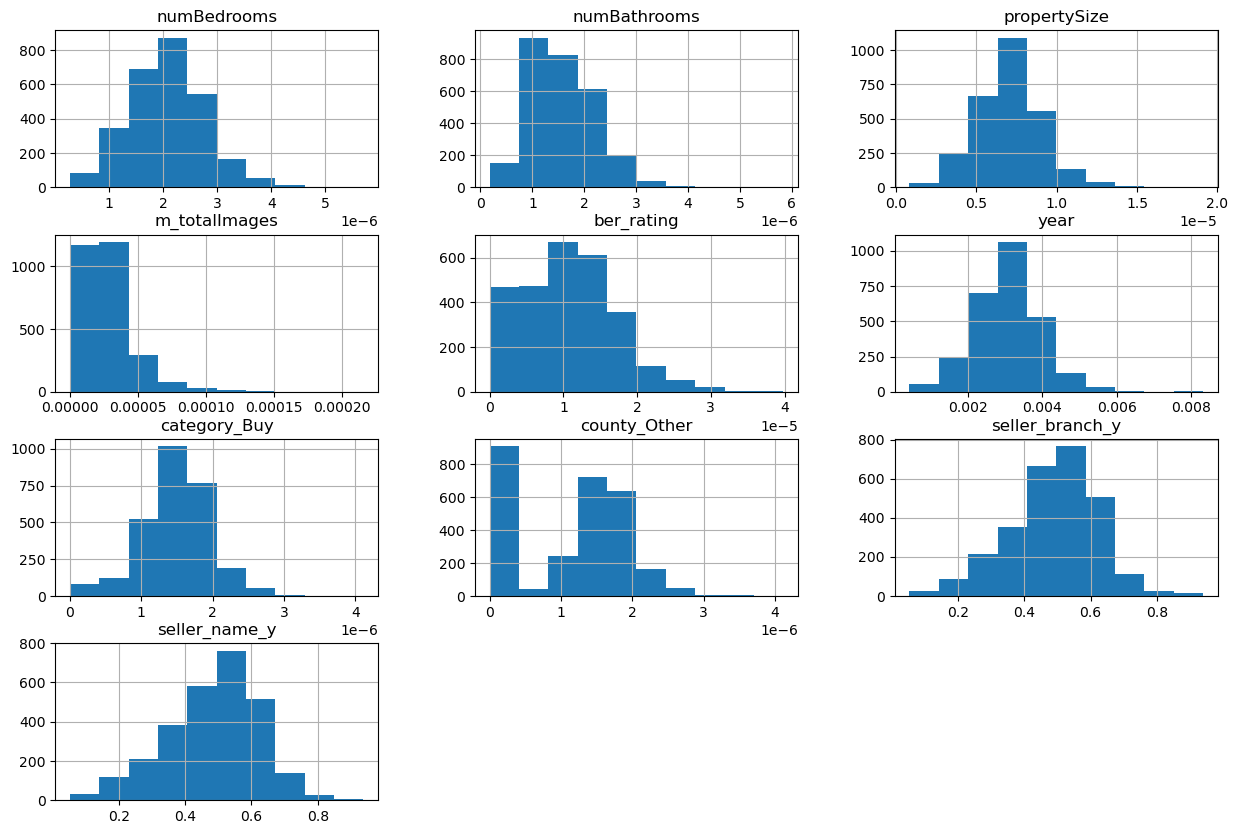

In [53]:
X_train.hist(figsize=(15,10));

#### Model Selection

#### Regression Models

In [54]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [55]:
evals = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [56]:
testing = np.asarray([[4,224,23,9, 2024, 0, 1, 0, 190000, 155000]])

#### Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [58]:
X_test_s = scaler.transform(X_test)

In [59]:
y_pred = reg.predict(X_test_s)

In [60]:
reg.predict(testing)

array([-2.75508386e+10])

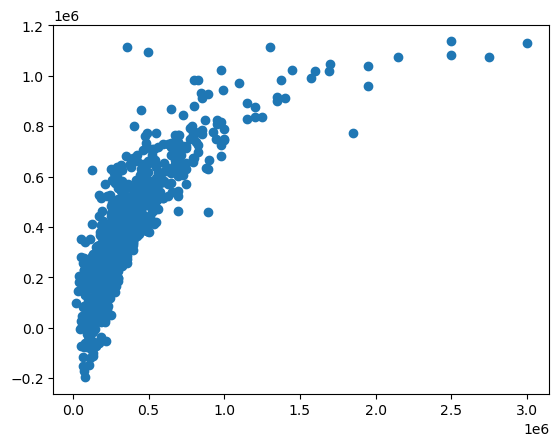

In [61]:
plt.scatter(y_test, y_pred)
plt.show()

In [62]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [63]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 92280.60127505995
MSE: 26154024197.405277
RMSE: 161722.05847504316
R2 Score: 0.6419898831573407
------------------------------


In [64]:
new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_36256\2724288395.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)


#### Random Forest Regression

In [65]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 50,
               max_depth = 10)

forest.fit(X_train_s, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [66]:
y_pred = forest.predict(X_test_s)

In [67]:
forest.predict(testing)

array([170009.12890406])

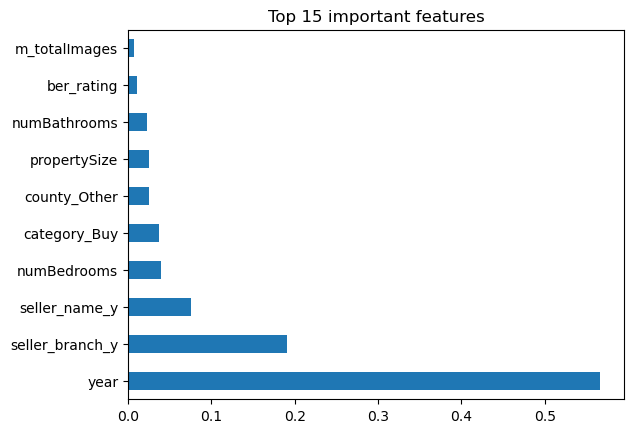

In [68]:
feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

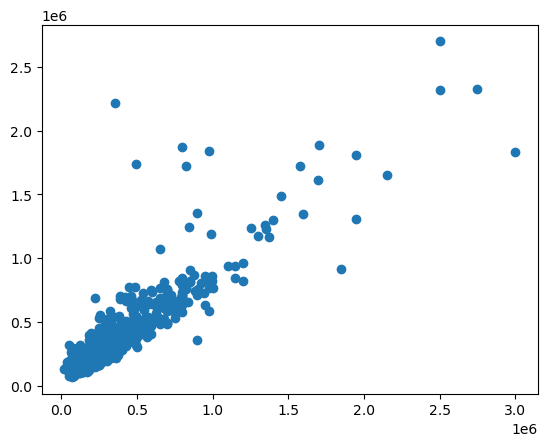

In [69]:
plt.scatter(y_test, y_pred)
plt.show()

In [70]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [71]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 63472.25613897088
MSE: 15713250230.11628
RMSE: 125352.50388451073
R2 Score: 0.7849087196524054
------------------------------


In [72]:
new_row = {"Model": "Random Forest","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

#### SVR

In [73]:
svr = SVR(C=50000)
svr.fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)

In [74]:
svr.predict(testing)

array([249995.34151643])

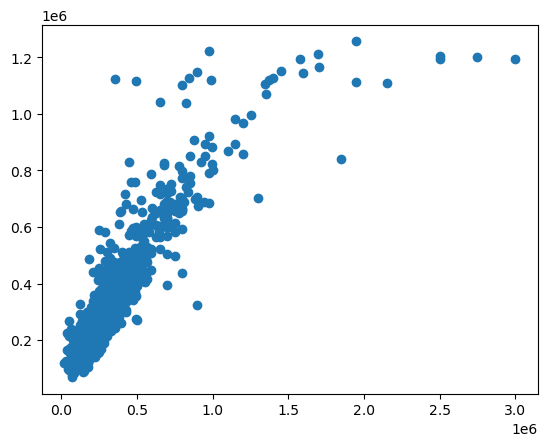

In [75]:
plt.scatter(y_test, y_pred)
plt.show()

In [76]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [77]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 63760.346727421726
MSE: 18454757559.429073
RMSE: 135848.28876150437
R2 Score: 0.7473815172653382
------------------------------


In [78]:
new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

#### XGBoost Regressor

In [79]:
xgb = XGBRegressor()
xgb.fit(X_train_s, y_train)
y_pred = xgb.predict(X_test_s)

In [80]:
xgb.predict(testing)

array([97363.88], dtype=float32)

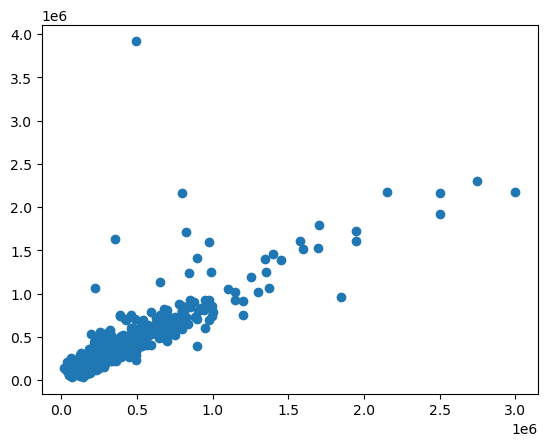

In [81]:
plt.scatter(y_test, y_pred)
plt.show()

In [82]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [83]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 64800.82835130668
MSE: 22671289903.70037
RMSE: 150569.8837872314
R2 Score: 0.6896633922896345
------------------------------


In [84]:
new_row = {"Model": "XGBoost","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

----------------

 #### Lasso Regression

In [85]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_s, y_train)
y_pred = lasso.predict(X_test_s)

In [86]:
lasso.predict(testing)

array([-2.75506803e+10])

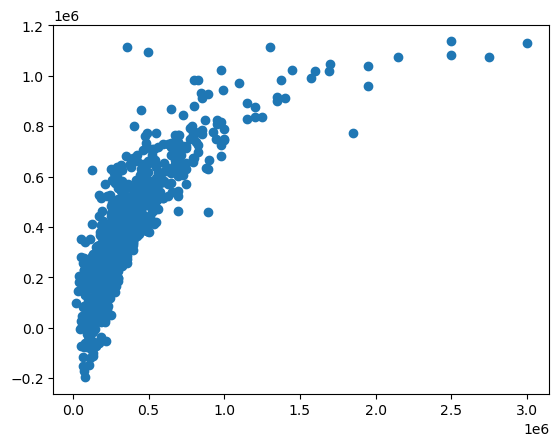

In [87]:
plt.scatter(y_test, y_pred)
plt.show()

In [88]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [89]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 92279.74038605404
MSE: 26153950109.114902
RMSE: 161721.8294143215
R2 Score: 0.641990897317047
------------------------------


In [90]:
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

------------------

 #### Elastic Net

In [91]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_train_s, y_train)
y_pred = elastic_net.predict(X_test_s)

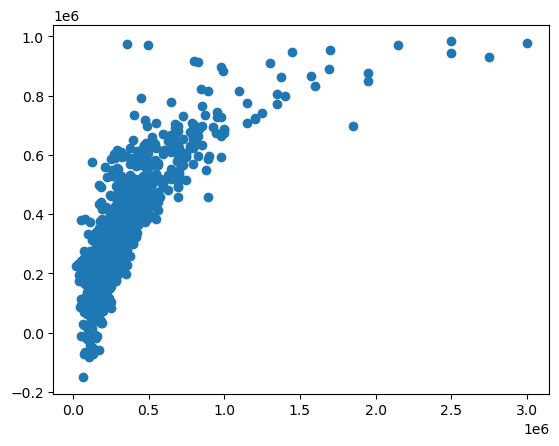

In [92]:
plt.scatter(y_test, y_pred)
plt.show()

In [93]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [94]:
new_row = {"Model": "Elastic","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

------------------------------

 #### Model Comparison

In [95]:
evals.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
1,Random Forest,63472.256139,1.571325e+10,125352.503885,0.784909
2,SVR,63760.346727,1.845476e+10,135848.288762,0.747382
3,XGBoost,64800.828351,2.267129e+10,150569.883787,0.689663
4,Lasso,92279.740386,2.615395e+10,161721.829414,0.641991
0,LinearRegression,92280.601275,2.615402e+10,161722.058475,0.641990
5,Elastic,90967.463293,2.906618e+10,170488.064717,0.602127


-----------------------------

 #### Hyper Parameter Tuning

* Applied to top 3 models from above.

 #### XGB

In [96]:
from sklearn.model_selection import GridSearchCV 

parameters = {'nthread':[10], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07, 0.09], #so called `eta` value
              'max_depth': [5, 6, 7, 9],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 200, 500]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

# fitting the model for grid search 
xgb_grid.fit(X_train_s, y_train) 

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07, 0.09],
                         'max_depth': [5, 6, 7, 9], 'min_child_weight': [4],
                         'n_estimators': [100, 200, 500], 'nthread': [10],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.7]},
             verbose=True)

In [97]:
grid_predictions = xgb_grid.predict(X_test_s) 
mae, mse, rmse, r_squared = evaluation(y_test, grid_predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 62306.99454568115
MSE: 16988881434.131851
RMSE: 130341.40337640933
R2 Score: 0.7674472050131758
------------------------------


In [98]:
xgb_grid.predict(testing)

array([71006.8], dtype=float32)

In [99]:
new_row = {"Model": "XGB_HT","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

 #### SVR

In [100]:
param_grid = {'C': [1000, 10000, 100000, 1000000, 10000000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  
  
svr_grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svr_grid.fit(X_train_s, y_train)
grid_predictions = svr_grid.predict(X_test_s)

mae, mse, rmse, r_squared = evaluation(y_test, grid_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...................C=1000, gamma=1;, score=0.005 total time=   0.3s
[CV 2/5] END ..................C=1000, gamma=1;, score=-0.011 total time=   0.3s
[CV 3/5] END ..................C=1000, gamma=1;, score=-0.033 total time=   0.4s
[CV 4/5] END ..................C=1000, gamma=1;, score=-0.026 total time=   0.3s
[CV 5/5] END ..................C=1000, gamma=1;, score=-0.023 total time=   0.4s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.285 total time=   0.4s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.277 total time=   0.3s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.161 total time=   0.2s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.313 total time=   0.3s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.287 total time=   0.2s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.243 total time=   0.2s
[CV 2/5] END ................C=1000, gamma=0.01

In [101]:
svr_grid.predict(testing)

array([278185.69995119])

In [102]:
new_row = {"Model": "SVR_HT","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

 #### Random Forest

In [103]:
# Number of trees in random forest
n_estimators = [25,50,100]
# Maximum number of levels in tree
max_depth = [5,10,20,30]


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
rf_grid.fit(X_train_s, y_train) 
grid_predictions = rf_grid.predict(X_test_s)
mae, mse, rmse, r_squared = evaluation(y_test, grid_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......max_depth=5, n_estimators=25;, score=0.656 total time=   0.2s
[CV 2/5] END ......max_depth=5, n_estimators=25;, score=0.838 total time=   0.2s
[CV 3/5] END ......max_depth=5, n_estimators=25;, score=0.768 total time=   0.2s
[CV 4/5] END ......max_depth=5, n_estimators=25;, score=0.786 total time=   0.2s
[CV 5/5] END ......max_depth=5, n_estimators=25;, score=0.839 total time=   0.2s
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.625 total time=   0.5s
[CV 2/5] END ......max_depth=5, n_estimators=50;, score=0.843 total time=   0.4s
[CV 3/5] END ......max_depth=5, n_estimators=50;, score=0.742 total time=   0.4s
[CV 4/5] END ......max_depth=5, n_estimators=50;, score=0.791 total time=   0.4s
[CV 5/5] END ......max_depth=5, n_estimators=50;, score=0.832 total time=   0.4s
[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.646 total time=   1.0s
[CV 2/5] END .....max_depth=5, n_estimators=100;

In [104]:
rf_grid.predict(testing)

array([165448.])

In [105]:
new_row = {"Model": "RandomForest_HT","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

In [106]:
evals.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
7,SVR_HT,58853.585443,1.371084e+10,117093.308618,0.812319
8,RandomForest_HT,62770.650563,1.559018e+10,124860.639268,0.786593
1,Random Forest,63472.256139,1.571325e+10,125352.503885,0.784909
6,XGB_HT,62306.994546,1.698888e+10,130341.403376,0.767447
2,SVR,63760.346727,1.845476e+10,135848.288762,0.747382
3,XGBoost,64800.828351,2.267129e+10,150569.883787,0.689663
4,Lasso,92279.740386,2.615395e+10,161721.829414,0.641991
0,LinearRegression,92280.601275,2.615402e+10,161722.058475,0.641990
5,Elastic,90967.463293,2.906618e+10,170488.064717,0.602127


#### We will select the top 2 for deployment

In [107]:
import pickle

In [108]:
pickle.dump(svr_grid, open())

TypeError: dump() missing required argument 'file' (pos 2)